# Customer Life time value

## Introduction 

Customer live time value is a prognostication of the net profit contributed to the whole future relationship with a customer.\
The purpose of the customer lifetime value metric is to assess the financial value of each customer. It is usually a relationship especially the one with customer contracts.(Telecommunications, Retail, eCommerce etc)
Here we want to access the CLV of the customers in the customer orders table, of the Tableau superstore dataset.

Finding out the RFM of a customer then further analysing the 
Customer live time value. \
Three methods to used here:  \
Average Sum\
Cohort Analysis \
BG/NBD Model (with Gamma-Gamma extension)

Dataset Info:
This is a customer orders database, part of the superstore data in Tableau. it contains orders occurring between 2014-01-03 and 2017-12-30.

Attribute Information:
Row ID:
Order ID:       Unique identify of an order. 
Order Date:     Order Date. Numeric, the day when each transaction was generated.
Ship Date:      Order Date. Numeric, the day when each shipment was made.
Ship Mode:      Method of shipment selected by the user
Customer ID:    Customer number. Nominal, an alphanumeric ID uniquely assigned to each customer.
Customer Name:  Nominal, the First and Last name of each customer.
Segment:        Customer Segment classification
Country:        Country name. Nominal, the name of the country where each customer resides.
City:           City name. Nominal, the name of the city where each customer resides.
Postal Code:    Postal code according to the address of the customer.
Region:         Geographic Region, of the country or state.
Product ID:     Unique id for the product sold 
Category:       Product category classification
Sub-Category:   A subcategory of the product category
Product Name:   Nominal, a name of the product.
Sales:          Sales Amount: the value of the product sold



In [18]:
pip install xlrd

You should consider upgrading via the '/Users/emeka/.pyenv/versions/3.8.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In this article, I will walk you through the proces sof RFM modelling. The make seegmentation based on transactional behaviour.  

## Data Preprocessing

In [55]:
#import the necessary libraries
import pandas as pd
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [20]:
#read the data uisng pandas 
df = pd.read_excel('SStore_data.xls')
print("Total number of transactions happened in the given period: "+ str(df.shape[0]))
#visualize the data for clarity
df.head(4)


Total number of transactions happened in the given period: 9994


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [46]:
#taking data that have price above 0
data= df[df['Sales'] > 0]
print("Total number of possitive transactions happened in the same period: "+ str(df.shape[0]))
data.describe()


Total number of possitive transactions happened in the same period: 9994


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [47]:
# Explore the data set by Printing the details of the dataset necessary for 
maxdate = df['Order Date'].dt.date.max()
mindate = df['Order Date'].dt.date.min()
unique_cust = df['Customer ID'].nunique()
tot_quantity = df['Quantity'].sum()
tot_sales = df['Sales'].sum()
AvgSales    =data['Sales'].mean()
Avgprofit = df['Profit'].mean()
PrftMargin = round((Avgprofit/AvgSales),6)

print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: ${tot_sales}")
print(f"Average Sales for the period: ${AvgSales}")
print(f"The avarage profit is: {Avgprofit}")
print(f"The avarage profit margin is: {PrftMargin}")

The Time range of transactions is: 2014-01-03 to 2017-12-30
Total number of unique customers: 793
Total Quantity Sold: 37873
Total Sales for the period: $2297200.8603000003
Average Sales for the period: $229.85800083049833
The avarage profit is: 28.656896307784663
The avarage profit margin is: 0.124672


## Data Exploration

It is always advised that before Modeling, it is always important to explore what data we have data. The reasons are \
°Helps us to understand the data of the business better.\
°Helps us to understand the business better.\
°Helps us validate the hypothesis.

Some of the hypotheses are:\
Most buyers are from the USA. \
The corporate buy more than any other segment\
Most used shipping is Standard class\
The west region purchase better than another region

Exploratory data analysis also helps us to answer questions such as:\
What is the trend of transactions for the given period?

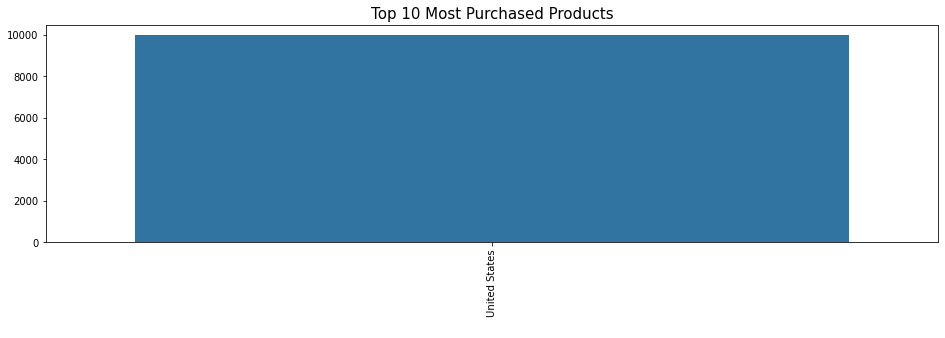

In [23]:
# The most country to purchase from the website
top_purchase = data.groupby('Country')['Sales'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Purchased Products", size=15)
plt.xlabel(" ")
plt.show()

This is a validation that proves 100% of the customers are from the states.

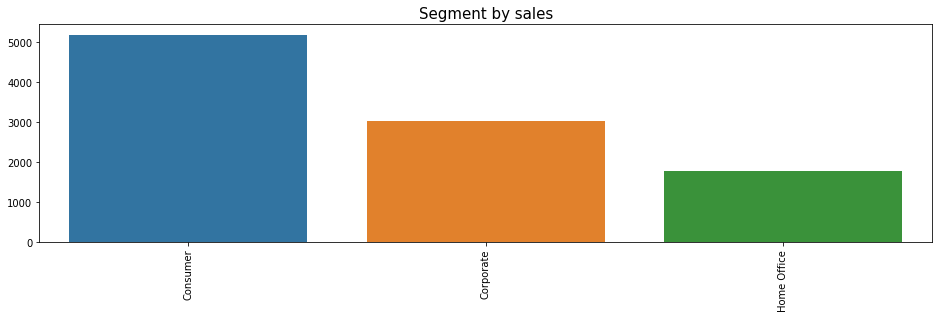

In [24]:
# The most segment to purchase from the website
top_purchase = data.groupby('Segment')['Sales'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Segment by sales", size=15)
plt.xlabel(" ")
plt.show()

This unvalidate the hypothesis that speculates the corporate segment is the biggest. 

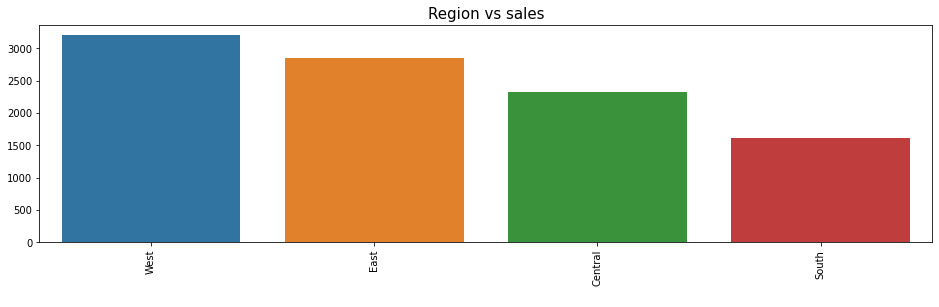

In [25]:
# The most country to purchase from the website
top_purchase = data.groupby('Region')['Quantity'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Region vs sales", size=15)
plt.xlabel(" ")
plt.show()

This unvalidated the hypothesis which said the south has most sales. The west performed battet overall. 

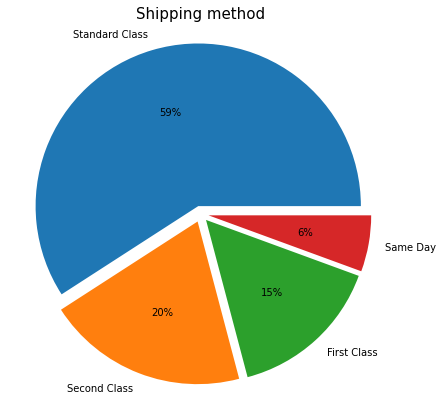

In [26]:
# Top shiping mode vs sales
top_country = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)[:10]
labels = top_country[:5].index
size = top_country[:5].values
plt.figure(figsize=(7,7))
plt.pie(size, labels=labels, explode=[0.05]*(len(size)), autopct='%1.0f%%')
plt.title("Shipping method ", size=15)
plt.axis('equal')
plt.show()

As Hypothesised the stansdatd shiping has the most methos of shipment.

In [27]:
data['Hour'] = df['Order Date'].dt.hour
data['Week'] = df['Order Date'].dt.week
data['Weekday'] = df['Order Date'].dt.weekday
data['WeekdayName'] = df['Order Date'].dt.day_name()
data['Month'] = df['Order Date'].dt.month
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Hour,Week,Weekday,WeekdayName,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,45,1,Tuesday,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0,45,1,Tuesday,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0,23,6,Sunday,6


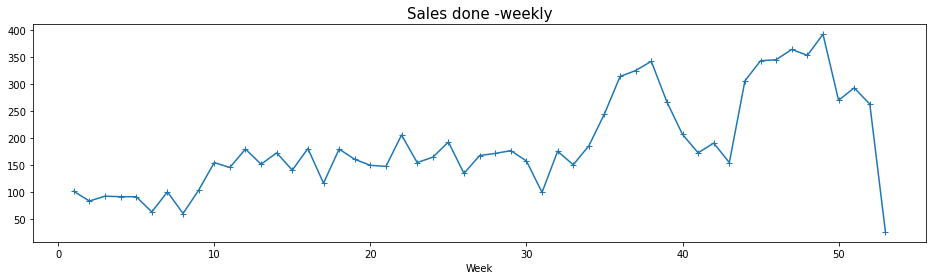

In [28]:
# Sales trend across week
month = data.groupby('Week')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='+')
plt.title("Sales done -weekly", size=15)
plt.show()

The last weeks of the year have the best sales

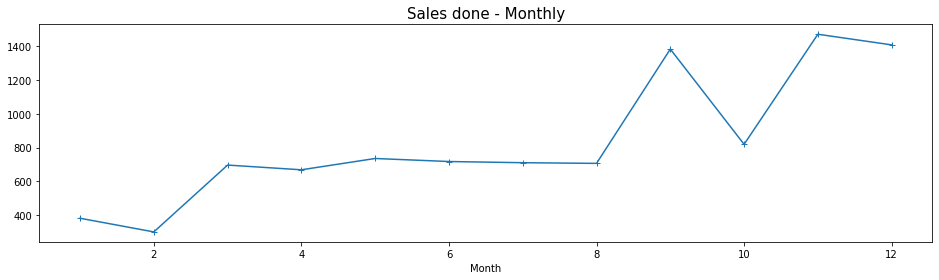

In [29]:
# Sales trend across months
month = data.groupby('Month')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='+')
plt.title("Sales done - Monthly", size=15)
plt.show()


Monthly trend makes a revealation that the number of sales in the platform is increasing. Further, the rate of increase stayed flat till August 2011 and rapidly increasing from September 2011.
The sudden dip in the month of December is because we have only data till December 9th.

## RFM modeling

In [30]:
#group the data by customer name, creat new columns Order date, the 
rfmTable = df.groupby('Customer Name').agg({'Order Date': lambda x: (x.max() - x.min()).days, # Recency
                                        'Order ID': lambda x: len(x),      # Frequency
                                        'Sales': lambda x: x.sum()})        # Monetary Value



In [31]:
#Change col names of our new table 
rfmTable['Order Date'] = rfmTable['Order Date'].astype(int)
rfmTable.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Sales': 'MoneyValue'}, inplace=True)

In [32]:
#Quick visual of a few records
rfmTable.head()

,Recency,Frequency,MoneyValue
Customer Name,,,
Aaron Bergman,996,6,886.156
Aaron Hawkins,1336,11,1744.700
Aaron Smayling,1164,10,3050.692
Adam Bellavance,780,18,7755.620
Adam Hart,1106,20,3250.337


Percentage of one time buuyers 0.0 %


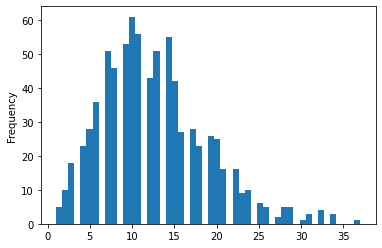

In [33]:
#visualize the frequency
rfmTable['Frequency'].plot(kind= 'hist', bins =50)
rfmTable['Frequency'].describe()
oneTimecustomers = round(sum(rfmTable['Frequency']== 0)/float(len(rfmTable))*(100),2)
print("Percentage of one time buuyers", oneTimecustomers, "%")

### Finding 
 The result is quite interesting as most of the customers are repeat customers

## Determining RFM Quartiles

In [34]:
#set the quatile values 
quant = rfmTable.quantile(q=[0.25,0.5,0.75])
#visualize the values
quant 

,Recency,Frequency,MoneyValue
0.25,829.0,8.0,1146.050
0.50,1092.0,12.0,2256.394
0.75,1222.0,16.0,3785.276


In [64]:
Average_sales= round(np.mean(rfmTable['MoneyValue']),2)
print(f"Average sales per customer: ${Average_sales}")

purchase_frequency =  round(np.mean(rfmTable['Frequency']), 2)
print(f"Average purchase Frequency: {purchase_frequency}")


#Find out the retention rate and churn
Retention_rate = rfmTable[rfmTable['Frequency']>1].shape[0]/rfmTable.shape[0]
churn = round(1 - Retention_rate, 3)
print(f"Churn: {churn}%")

Average sales per customer: $2896.85
Average purchase Frequency: 12.6
Churn: 0.006%


In [74]:
# Calculating the CLV
Profit_margin = PrftMargin 

CLV = round(((Average_sales * purchase_frequency/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $758427.77


From the value above the  Customer Lifetime Value (CLV) for each customer is: $758427.77\
From our basic model, we got a <b> CLV </b> value of <b>$758k</b> for each customer.\ 
I think this doesnt make sense. This value is recociled as a resulf of some customers that have high sales values \
The reason is becasue of the very high sales value from very few customers, which actually skewed the overall number. Also, not all the customers are same right!
Take a look at it for yourself:

count      793.000000
mean      2896.848500
std       2628.670117
min          4.833000
25%       1146.050000
50%       2256.394000
75%       3785.276000
max      25043.050000
Name: MoneyValue, dtype: float64

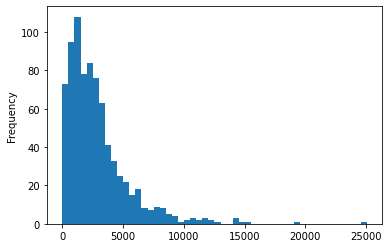

In [73]:
#Monetary value per customer 
rfmTable['MoneyValue'].plot(kind= 'hist', bins =50)
rfmTable['MoneyValue'].describe()

More customers (75%) have between 0-$3500 dominate the sales sales amount.\
As seen from the visual the histogram is skewed.\
This method is biased all customers can't have about 758k valuation \
We have to look at it in a different perspective. 
